In [1]:
import numpy as np
import cbsyst as cb
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

## K<sub>0</sub>

In [2]:
T = np.arange(-2, 30, 0.1)
Ks_35 = cb.calc_Ks(T=T, S=35)
Ks_30 = cb.calc_Ks(T=T, S=30)

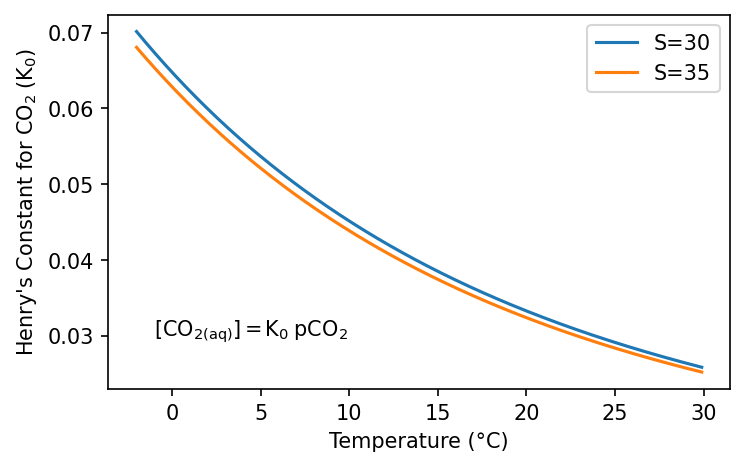

In [3]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(T, Ks_30.K0, label='S=30')
ax.plot(T, Ks_35.K0, label='S=35')

ax.legend()

ax.text(-1, 0.03, "$[CO_{2(aq)}] = K_0~pCO_2$")

ax.set_xlabel('Temperature (°C)')
ax.set_ylabel("Henry's Constant for $CO_2~(K_0)$")

fig.savefig('figures/carbon-K0.png')

## Bjerrum Plot

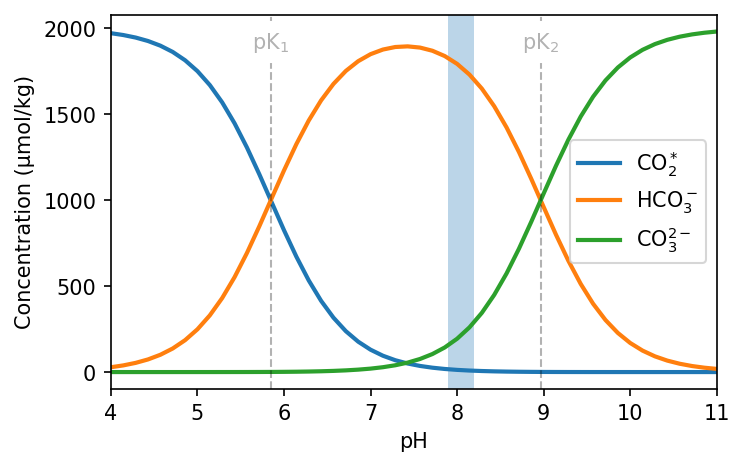

In [4]:
pH = np.linspace(4, 11)

sw = cb.Csys(pHtot=pH, DIC=2000)

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(sw.pHtot, sw.CO2, label='$CO_2^*$', lw=2)
ax.plot(sw.pHtot, sw.HCO3, label='$HCO_3^-$', lw=2)
ax.plot(sw.pHtot, sw.CO3, label='$CO_3^{2-}$', lw=2)

ax.set_xlim(pH.min(), pH.max())

ax.axvspan(7.9, 8.2, color='C0', alpha=0.3, lw=0)

ax.legend()

ax.set_xlabel('pH')
ax.set_ylabel('Concentration (μmol/kg)')

ax.axvline(-np.log10(sw.Ks.K1), ls='--', color=(0,0,0,0.3), lw=1)
ax.text(-np.log10(sw.Ks.K1), 1850, '$pK_1$', ha='center', va='bottom', color=(0,0,0,0.3), backgroundcolor='w', fontsize=10)
ax.axvline(-np.log10(sw.Ks.K2), ls='--', color=(0,0,0,0.3), lw=1)
ax.text(-np.log10(sw.Ks.K2), 1850, '$pK_2$', ha='center', va='bottom', color=(0,0,0,0.3), backgroundcolor='w', fontsize=10)

fig.savefig('figures/carbon-bjerrum.png')

## K0K1K2

In [5]:
T = np.arange(-2, 30, 0.1)
Ks_35 = cb.calc_Ks(T=T, S=35)
Ks_30 = cb.calc_Ks(T=T, S=30)

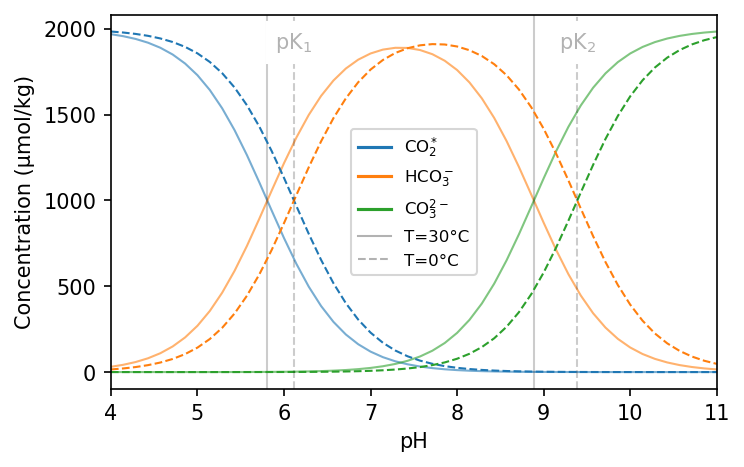

In [6]:
pH = np.linspace(4, 11)

sw_30 = cb.Csys(pHtot=pH, DIC=2000, T_in=30.)
sw_0 = cb.Csys(pHtot=pH, DIC=2000, T_in=0.)

fig, ax = plt.subplots(constrained_layout=True)

for sw, ls, lw, alpha in zip([sw_30, sw_0], ['-', '--'], [1,1], [.6, 1]):

    ax.plot(sw.pHtot, sw.CO2, color='C0', ls=ls, lw=lw, alpha=alpha)
    ax.plot(sw.pHtot, sw.HCO3, color='C1', ls=ls, lw=lw, alpha=alpha)
    ax.plot(sw.pHtot, sw.CO3, color='C2', ls=ls, lw=lw, alpha=alpha)

    
    ax.axvline(-np.log10(sw.Ks.K1), ls=ls, color=(0,0,0,0.2), lw=lw)
    ax.axvline(-np.log10(sw.Ks.K2), ls=ls, color=(0,0,0,0.2), lw=lw)

ax.text(-np.log10(sw.Ks.K1), 1850, '$pK_1$', ha='center', va='bottom', color=(0,0,0,0.3), backgroundcolor='w', fontsize=10)
ax.text(-np.log10(sw.Ks.K2), 1850, '$pK_2$', ha='center', va='bottom', color=(0,0,0,0.3), backgroundcolor='w', fontsize=10)

ax.plot([],[],label='$CO_2^*$',color='C0')
ax.plot([],[],label='$HCO_3^-$',color='C1')
ax.plot([],[],label='$CO_3^{2-}$',color='C2')
ax.plot([],[],label='T=30°C',color=(0,0,0,0.3), lw=1, ls='-')
ax.plot([],[],label='T=0°C',color=(0,0,0,0.3), lw=1, ls='--')

ax.set_xlim(pH.min(), pH.max())
ax.set_xlabel('pH')
ax.set_ylabel('Concentration (μmol/kg)')


ax.legend(fontsize=8)

fig.savefig('figures/carbon-bjerrum-temp.png')

## pCO2 vs pH

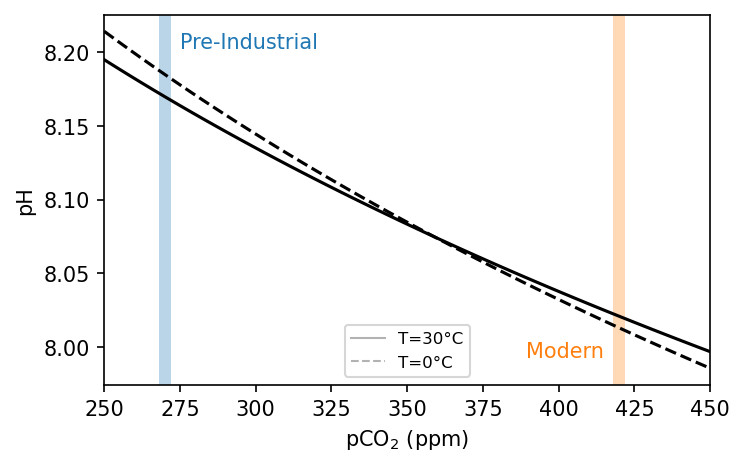

In [7]:
fig, ax = plt.subplots(constrained_layout=True)

for T, ls in zip([0, 30], ['--', '-']):
    swC = cb.Csys(pCO2=np.linspace(250, 450), TA=2300, T_in=T)

    ax.plot(swC.pCO2, swC.pHtot, color='k', ls=ls)


ax.plot([],[],label='T=30°C',color=(0,0,0,0.3), lw=1, ls='-')
ax.plot([],[],label='T=0°C',color=(0,0,0,0.3), lw=1, ls='--')

ax.axvspan(418,422, lw=0, alpha=0.3, color='C1')
ax.text(415, 7.99, 'Modern', ha='right', va='bottom', fontsize=10, color='C1')
ax.axvspan(268,272, lw=0, alpha=0.3, color='C0')
ax.text(275, 8.2, 'Pre-Industrial', ha='left', va='bottom', fontsize=10, color='C0')

ax.set_xlim(250, 450)

ax.legend(fontsize=8)

ax.set_ylabel('pH')
ax.set_xlabel('$pCO_2$ (ppm)')

fig.savefig('figures/carbon-pCO2-pH.png')

## pCO2 vs DIC

Text(0.5, 0, '$pCO_2$ (ppm)')

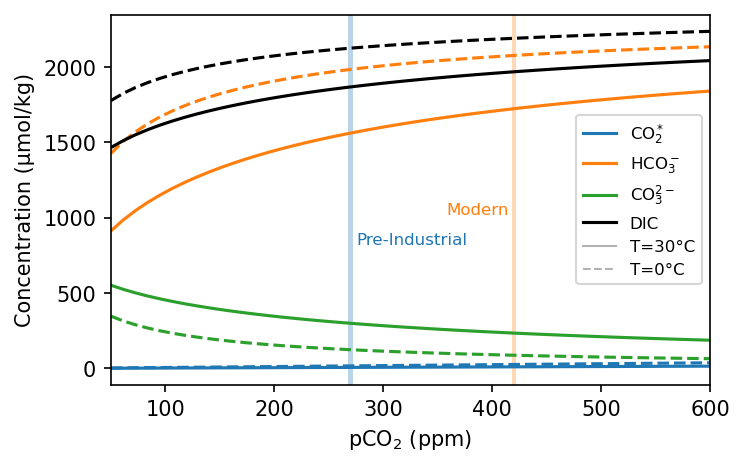

In [8]:
fig, ax = plt.subplots(constrained_layout=True)

for T, ls in zip([0, 30], ['--', '-']):
    swC = cb.Csys(pCO2=np.linspace(50, 600), TA=2300, T_in=T)

    ax.plot(swC.pCO2, swC.CO2, color='C0', ls=ls)
    ax.plot(swC.pCO2, swC.HCO3, color='C1', ls=ls)
    ax.plot(swC.pCO2, swC.CO3, color='C2', ls=ls)
    ax.plot(swC.pCO2, swC.DIC, color='k', ls=ls)


ax.plot([], [], label='$CO_2^*$')
ax.plot([], [], label='$HCO_3^-$')
ax.plot([], [], label='$CO_3^{2-}$')
ax.plot([], [], color='k', label='DIC')
ax.plot([],[],label='T=30°C',color=(0,0,0,0.3), lw=1, ls='-')
ax.plot([],[],label='T=0°C',color=(0,0,0,0.3), lw=1, ls='--')
    
ax.legend(fontsize=8)

ax.set_xlim(50, 600)

ax.axvspan(418,422, lw=0, alpha=0.3, color='C1')
ax.text(415, 1000, 'Modern', ha='right', va='bottom', fontsize=8, color='C1')
ax.axvspan(268,272, lw=0, alpha=0.3, color='C0')
ax.text(275, 800, 'Pre-Industrial', ha='left', va='bottom', fontsize=8, color='C0')


ax.set_ylabel('Concentration (μmol/kg)')
ax.set_xlabel('$pCO_2$ (ppm)')

# fig.savefig('figures/carbon-pCO2-DIC.png')

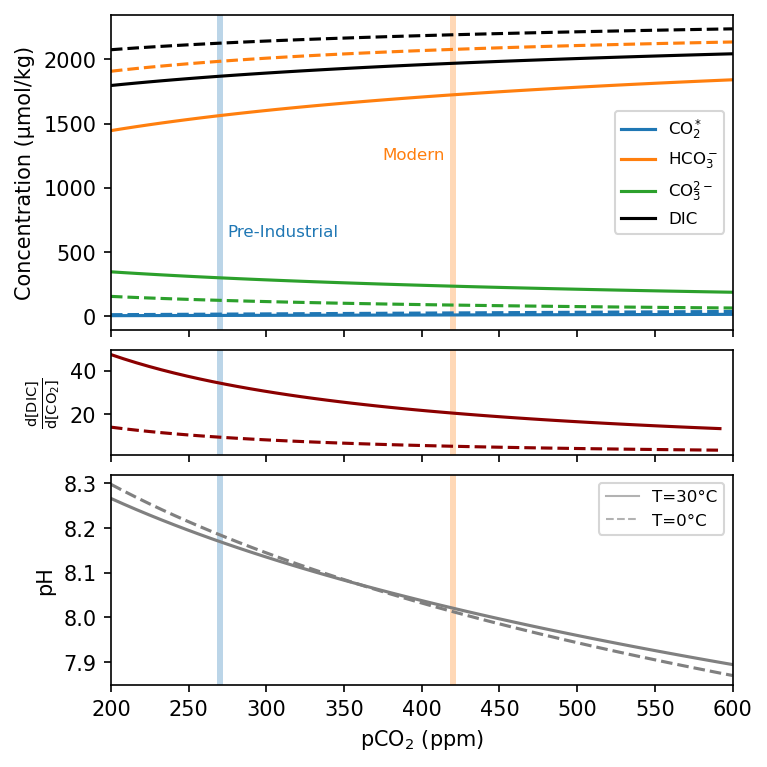

In [9]:
fig = plt.figure(figsize=(5, 5), constrained_layout=True)

gs = GridSpec(6,1,fig)

ax0 = fig.add_subplot(gs[0:3,0])
ax2 = fig.add_subplot(gs[3,0])
ax1 = fig.add_subplot(gs[4:,0])

axs = [ax0, ax1, ax2]

for ax in [ax0, ax2]:
    ax.set_xticklabels([])

pCO2 = np.linspace(200, 600)

for T, ls in zip([0, 30], ['--', '-']):
    swC = cb.Csys(pCO2=pCO2, TA=2300, T_in=T)

    ax = ax0
    ax.plot(swC.pCO2, swC.CO2, color='C0', ls=ls)
    ax.plot(swC.pCO2, swC.HCO3, color='C1', ls=ls)
    ax.plot(swC.pCO2, swC.CO3, color='C2', ls=ls)
    ax.plot(swC.pCO2, swC.DIC, color='k', ls=ls)

    axs[1].plot(swC.pCO2, swC.pHtot, color='grey', ls=ls)
    
    axs[2].plot(swC.pCO2[:-1], np.diff(swC.DIC)/np.diff(swC.CO2), color='darkred', ls=ls)
    # axs[2].plot(swC.pCO2, swC.DIC / swC.CO2, color='darkred', ls=ls)

ax0.plot([], [], label='$CO_2^*$')
ax0.plot([], [], label='$HCO_3^-$')
ax0.plot([], [], label='$CO_3^{2-}$')
ax0.plot([], [], color='k', label='DIC')
ax1.plot([],[],label='T=30°C',color=(0,0,0,0.3), lw=1, ls='-')
ax1.plot([],[],label='T=0°C',color=(0,0,0,0.3), lw=1, ls='--')
    
ax0.legend(fontsize=8)
ax1.legend(fontsize=8)

for ax in axs:
    ax.set_xlim(pCO2.min(), pCO2.max())

    ax.axvspan(418,422, lw=0, alpha=0.3, color='C1')
    ax.axvspan(268,272, lw=0, alpha=0.3, color='C0')

ax0.text(415, 1200, 'Modern', ha='right', va='bottom', fontsize=8, color='C1')
ax0.text(275, 600, 'Pre-Industrial', ha='left', va='bottom', fontsize=8, color='C0')

ax0.set_ylabel('Concentration (μmol/kg)')
ax1.set_ylabel('pH')
ax2.set_ylabel(r'$\frac{d [DIC]}{d [CO_2]}$')
axs[1].set_xlabel('$pCO_2$ (ppm)')

fig.savefig('figures/carbon-pCO2-DIC.png')

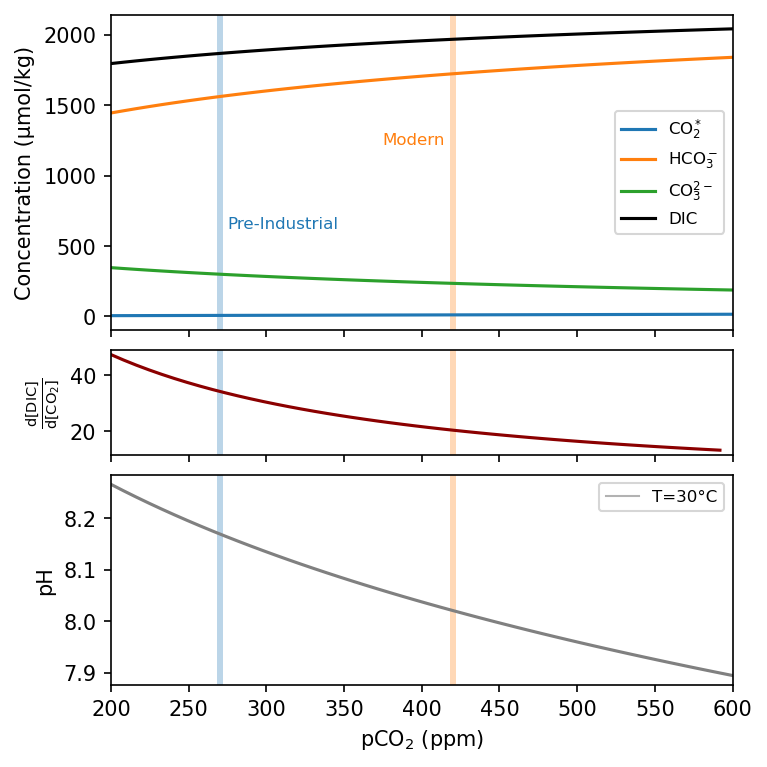

In [10]:
fig = plt.figure(figsize=(5, 5), constrained_layout=True)

gs = GridSpec(6,1,fig)

ax0 = fig.add_subplot(gs[0:3,0])
ax2 = fig.add_subplot(gs[3,0])
ax1 = fig.add_subplot(gs[4:,0])

axs = [ax0, ax1, ax2]

for ax in [ax0, ax2]:
    ax.set_xticklabels([])

pCO2 = np.linspace(200, 600)

for T, ls in zip([30], ['-']):
    swC = cb.Csys(pCO2=pCO2, TA=2300, T_in=T)

    ax = ax0
    ax.plot(swC.pCO2, swC.CO2, color='C0', ls=ls)
    ax.plot(swC.pCO2, swC.HCO3, color='C1', ls=ls)
    ax.plot(swC.pCO2, swC.CO3, color='C2', ls=ls)
    ax.plot(swC.pCO2, swC.DIC, color='k', ls=ls)

    axs[1].plot(swC.pCO2, swC.pHtot, color='grey', ls=ls)
    
    axs[2].plot(swC.pCO2[:-1], np.diff(swC.DIC)/np.diff(swC.CO2), color='darkred', ls=ls)
    # axs[2].plot(swC.pCO2, swC.DIC / swC.CO2, color='darkred', ls=ls)

ax0.plot([], [], label='$CO_2^*$')
ax0.plot([], [], label='$HCO_3^-$')
ax0.plot([], [], label='$CO_3^{2-}$')
ax0.plot([], [], color='k', label='DIC')
ax1.plot([],[],label='T=30°C',color=(0,0,0,0.3), lw=1, ls='-')
# ax1.plot([],[],label='T=0°C',color=(0,0,0,0.3), lw=1, ls='--')
    
ax0.legend(fontsize=8)
ax1.legend(fontsize=8)

for ax in axs:
    ax.set_xlim(pCO2.min(), pCO2.max())

    ax.axvspan(418,422, lw=0, alpha=0.3, color='C1')
    ax.axvspan(268,272, lw=0, alpha=0.3, color='C0')

ax0.text(415, 1200, 'Modern', ha='right', va='bottom', fontsize=8, color='C1')
ax0.text(275, 600, 'Pre-Industrial', ha='left', va='bottom', fontsize=8, color='C0')

ax0.set_ylabel('Concentration (μmol/kg)')
ax1.set_ylabel('pH')
ax2.set_ylabel(r'$\frac{d [DIC]}{d [CO_2]}$')
axs[1].set_xlabel('$pCO_2$ (ppm)')

fig.savefig('figures/carbon-pCO2-DIC-30.png')

## CO2 from TA and DIC

In [11]:
cb.Csys(pCO2=400, TA=2300).DIC

array([2001.54971968])

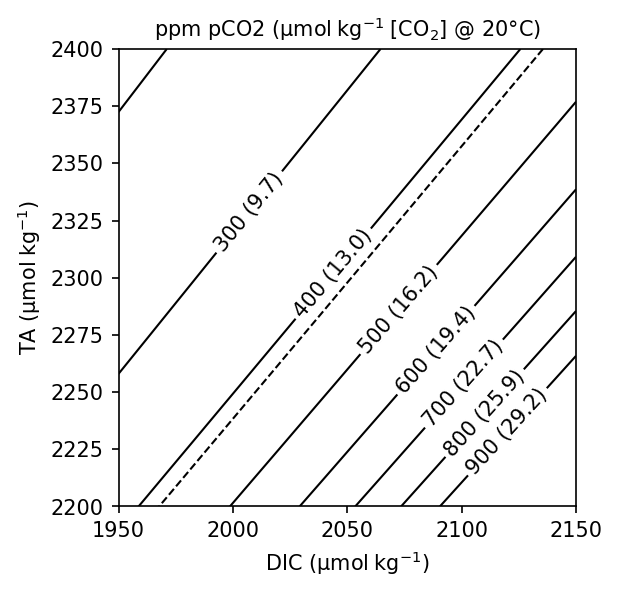

In [22]:
DIC = np.linspace(1950, 2150)
TA = np.linspace(2200, 2400)

dic, ta = np.meshgrid(DIC, TA)

sw = cb.Csys(DIC=dic, TA=ta, T_in=20)

pCO2_levels = np.array([200, 300, 400, 500, 600, 700, 800, 900])
CO2_levels = sw.Ks.K0 * pCO2_levels

fmt = {pco2: f'{pco2:.0f} ({co2:.1f})' for pco2, co2 in zip(pCO2_levels, CO2_levels)}

fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)

cs = ax.contour(dic, ta, sw.pCO2, pCO2_levels, colors='k', linestyles='-', linewidths=1)
plt.clabel(cs, fmt=fmt)

ax.contour(dic, ta, sw.pCO2, [420], colors='k', linestyles='--', linewidths=1)

ax.set_xlabel('DIC ($\mu mol~kg^{-1}$)')
ax.set_ylabel('TA ($\mu mol~kg^{-1}$)')

ax.set_aspect(1)

ax.set_title('ppm pCO2 ($\mu mol~kg^{-1}~[CO_2]$ @ 20°C)', fontsize=10)

fig.savefig('figures/carbon-DIC-TA.png')

Meaning of $\tau$

$$
\frac{dC}{dt} = \frac{1}{\tau} ( C_0 - C)
$$

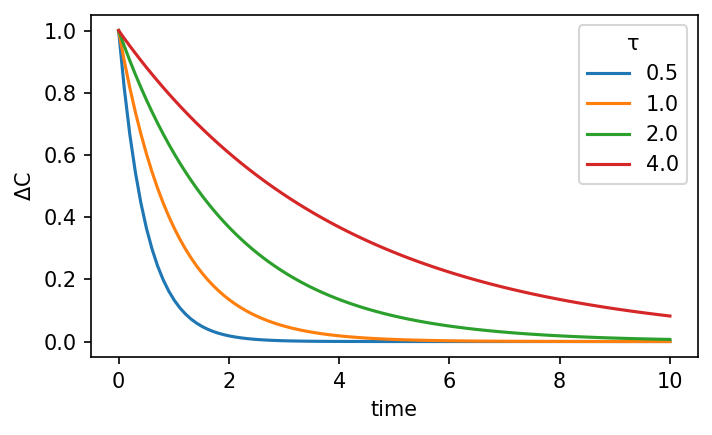

In [13]:
D0 = 1

t = np.linspace(0, 10, 100)

tau = 2


for tau in [0.5, 1,2,4]:
    plt.plot(t, D0 * np.exp(-t / tau), label=f'{tau:.1f}')
    
plt.legend(title='$\\tau$')
plt.ylabel('$\Delta C$')
plt.xlabel('time')

plt.tight_layout()
plt.savefig('figures/carbon-tau.png')

## pH vs Temp

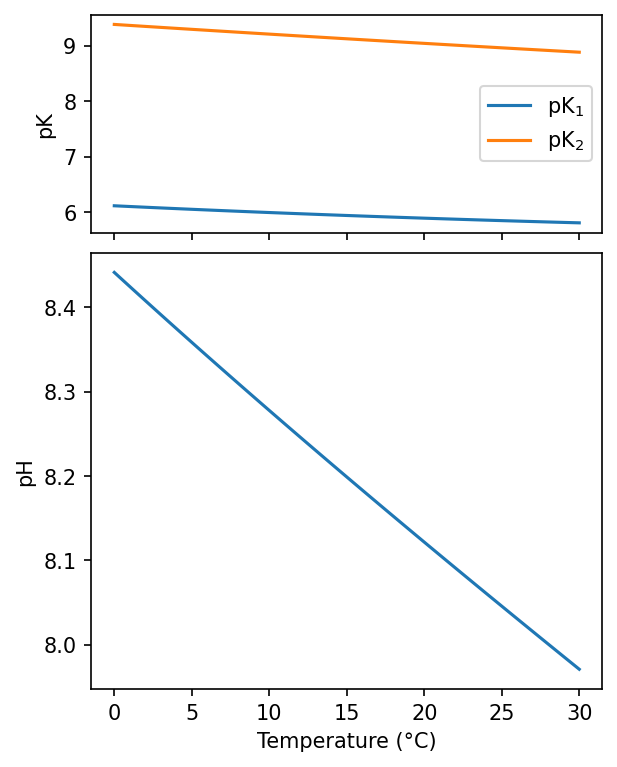

In [14]:
fig = plt.figure(figsize=(4, 5), constrained_layout=True)

gs = GridSpec(3,1,fig)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1:,0])

sw = cb.Csys(DIC=2000, TA=2300, T_in=np.linspace(0, 30))

ax0.plot(sw.T_in, -np.log10(sw.Ks.K1), label='$pK_1$')
ax0.plot(sw.T_in, -np.log10(sw.Ks.K2), label='$pK_2$')
ax0.legend()

ax0.set_xticklabels([])

ax0.set_ylabel('pK')
ax1.set_ylabel('pH')
ax1.set_xlabel('Temperature (°C)')

ax1.plot(sw.T_in, sw.pHtot, label='pH')

fig.savefig('figures/carbon-pH-Temp.png')

## Carbonates

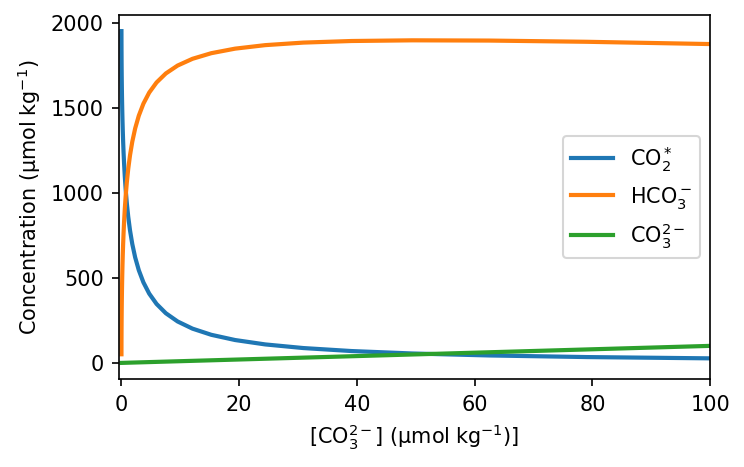

In [82]:
pH = np.linspace(4, 11)

CO3 = np.logspace(-3, 2)

sw = cb.Csys(CO3=CO3, DIC=2000)

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(sw.CO3, sw.CO2, label='$CO_2^*$', lw=2)
ax.plot(sw.CO3, sw.HCO3, label='$HCO_3^-$', lw=2)
ax.plot(sw.CO3, sw.CO3, label='$CO_3^{2-}$', lw=2)

ax.set_xlim(CO3.min()-0.5, CO3.max())

# ax.axvspan(7.9, 8.2, color='C0', alpha=0.3, lw=0)

ax.legend()

ax.set_xlabel('[CO$_3^{2-}$] ($\mu mol~kg^{-1}$)]')
ax.set_ylabel('Concentration ($\mu mol~kg^{-1}$)')

# ax.axvline(-np.log10(sw.Ks.K1), ls='--', color=(0,0,0,0.3), lw=1)
# ax.text(-np.log10(sw.Ks.K1), 1850, '$pK_1$', ha='center', va='bottom', color=(0,0,0,0.3), backgroundcolor='w', fontsize=10)
# ax.axvline(-np.log10(sw.Ks.K2), ls='--', color=(0,0,0,0.3), lw=1)
# ax.text(-np.log10(sw.Ks.K2), 1850, '$pK_2$', ha='center', va='bottom', color=(0,0,0,0.3), backgroundcolor='w', fontsize=10)

fig.savefig('figures/carbon-bjerrum-CO3.png')

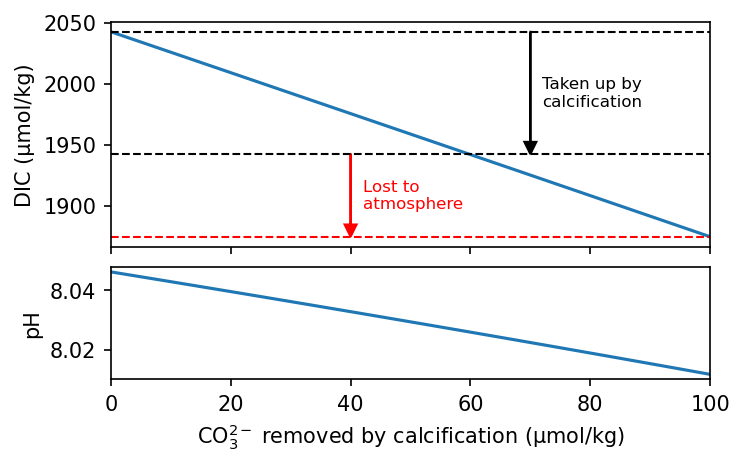

In [62]:
calc = np.linspace(0, 100)
DIC = 2050 - calc
TA = 2300 - 2 * calc

c = cb.Csys(pCO2=400, TA=TA, T_in=20)

fig = plt.figure(constrained_layout=True)

g = GridSpec(3, 1, figure=fig)

ax0 = fig.add_subplot(g[-1])
ax0.plot(calc, c.pHtot)

ax1 = fig.add_subplot(g[:-1])

# ax1.plot(calc, c.CO3, label='CO3')
# ax1.plot(calc, c.HCO3, label='HCO3')

ax1.plot(calc, c.DIC, label='DIC')

ax1.set_xticklabels([])

ax0.set_xlabel('$CO_3^{2-}$ removed by calcification (μmol/kg)')
ax0.set_ylabel('pH')

ax1.set_ylabel('DIC (μmol/kg)')

ax1.axhline(c.DIC[0], color='k', ls='--', lw=1)
ax1.axhline(c.DIC[0] - 100, color='k', ls='--', lw=1)
ax1.axhline(c.DIC[-1], color='r', ls='--', lw=1)

ax1.arrow(70, c.DIC[0], 0, -90, head_width=2, head_length=10, fc='k', ec='k')
ax1.text(72, c.DIC[0] - 50, 'Taken up by\ncalcification', ha='left', va='center', fontsize=8)

ax1.arrow(40, c.DIC[0] - 100, 0, c.DIC[-1] - c.DIC[0] + 100 + 10, head_width=2, head_length=10, fc='r', ec='r')
ax1.text(42, c.DIC[-1] - (c.DIC[-1] - c.DIC[0] + 100)/2, 'Lost to\natmosphere', ha='left', va='center', fontsize=8, color='r')


for ax in [ax0, ax1]:
    ax.set_xlim(0,100)
    
fig.savefig('figures/carbon-calc-co2-release.png')

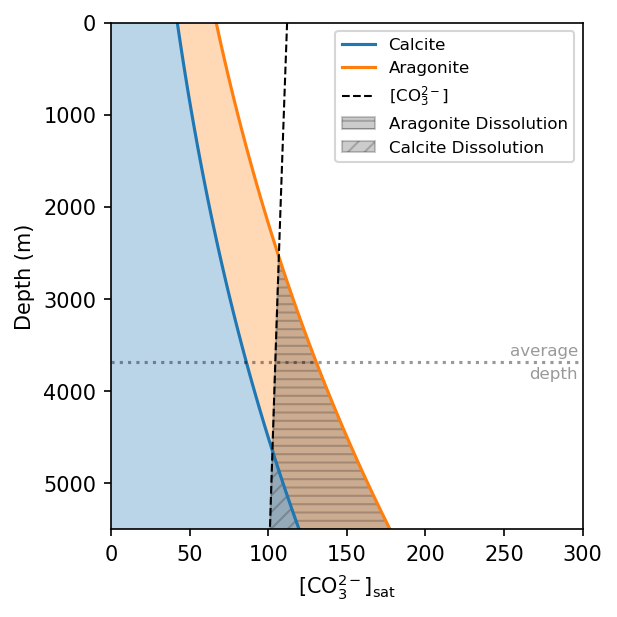

In [10]:
z = np.linspace(0, 5500)
cz = cb.Csys(TA=2300, DIC=2150, T_in=4, P_in=z/10)

Ca = 10.2e-3

satC_CO3 = 1e6 * cz.Ks.KspC / Ca
satA_CO3 = 1e6 * cz.Ks.KspA / Ca



fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)
ax.fill_betweenx(z, 0, satC_CO3, alpha=0.3)
ax.plot(satC_CO3, z, label='Calcite')
ax.fill_betweenx(z, satA_CO3, satC_CO3, alpha=0.3)
ax.plot(satA_CO3, z, label='Aragonite')

ax.set_ylim(z.max(), 0)
ax.set_xlim(0, 300)

ax.plot(cz.CO3, z, ls='--', lw=1, color='k', label='$[CO_3^{2-}]$')

ax.axhline(3_688, ls=':', color=(0,0,0,0.4))
ax.text(297, 3_688, 'average\ndepth', color=(0,0,0,0.4), ha='right', va='center', fontsize=8, linespacing=1.6)

# ind = cz.CO3 > satA_CO3
# ax.fill_betweenx(z[ind], cz.CO3[ind], satA_CO3[ind],  color='k', alpha=0.2, hatch='//')

ind = (cz.CO3 < satA_CO3)
y1 = np.where(satC_CO3[ind] > cz.CO3[ind], satC_CO3[ind], cz.CO3[ind])
ax.fill_betweenx(z[ind], y1, satA_CO3[ind], color='k', alpha=0.2, hatch=r'---', label='Aragonite Dissolution')

ind = (cz.CO3 < satC_CO3)
ax.fill_betweenx(z[ind], cz.CO3[ind], satC_CO3[ind], color='k', alpha=0.2, hatch='///', label='Calcite Dissolution')


ax.set_ylabel('Depth (m)')
ax.set_xlabel('$[CO_3^{2-}]_{sat}$')

ax.legend(fontsize=8)

fig.savefig('figures/carbon-CO3-sat.4.png')

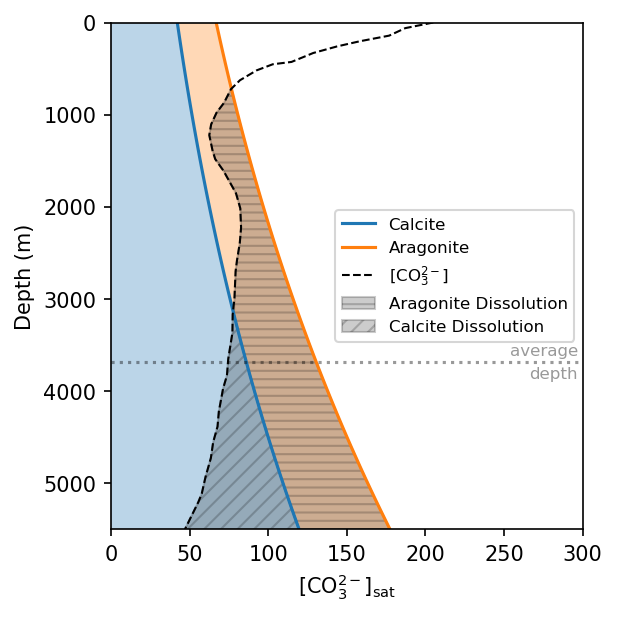

In [101]:
profile = pd.read_csv('data/co3_profile.csv')
profile.co3 -= 15

czp = cb.Csys(TA=2300, DIC=2170, T_in=4, P_in=profile.z/10)

Ca = 10.2e-3

psatC_CO3 = 1e6 * czp.Ks.KspC / Ca
psatA_CO3 = 1e6 * czp.Ks.KspA / Ca



fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)
ax.fill_betweenx(z, 0, satC_CO3, alpha=0.3)
ax.plot(satC_CO3, z, label='Calcite')
ax.fill_betweenx(z, satA_CO3, satC_CO3, alpha=0.3)
ax.plot(satA_CO3, z, label='Aragonite')

ax.set_ylim(5500, 0)
ax.set_xlim(0, 300)

ax.plot(profile.co3, profile.z, ls='--', lw=1, color='k', label='$[CO_3^{2-}]$')

ax.axhline(3_688, ls=':', color=(0,0,0,0.4))
ax.text(297, 3_688, 'average\ndepth', color=(0,0,0,0.4), ha='right', va='center', fontsize=8, linespacing=1.6)

# ind = profile.co3 > psatA_CO3
# ax.fill_betweenx(profile.z[ind], profile.co3[ind], psatA_CO3[ind],  color='k', alpha=0.2, hatch='//')

ind = (profile.co3 < psatA_CO3)
y1 = np.where(psatC_CO3[ind] > profile.co3[ind], psatC_CO3[ind], profile.co3[ind])
ax.fill_betweenx(profile.z[ind], y1, psatA_CO3[ind], color='k', alpha=0.2, hatch=r'---', label='Aragonite Dissolution')

ind = (profile.co3 < psatC_CO3)
ax.fill_betweenx(profile.z[ind], profile.co3[ind], psatC_CO3[ind], color='k', alpha=0.2, hatch='///', label='Calcite Dissolution')


ax.set_ylabel('Depth (m)')
ax.set_xlabel('$[CO_3^{2-}]_{sat}$')

ax.legend(fontsize=8)

fig.savefig('figures/carbon-CO3-sat-real.png')

## pCO2 vs. Omega

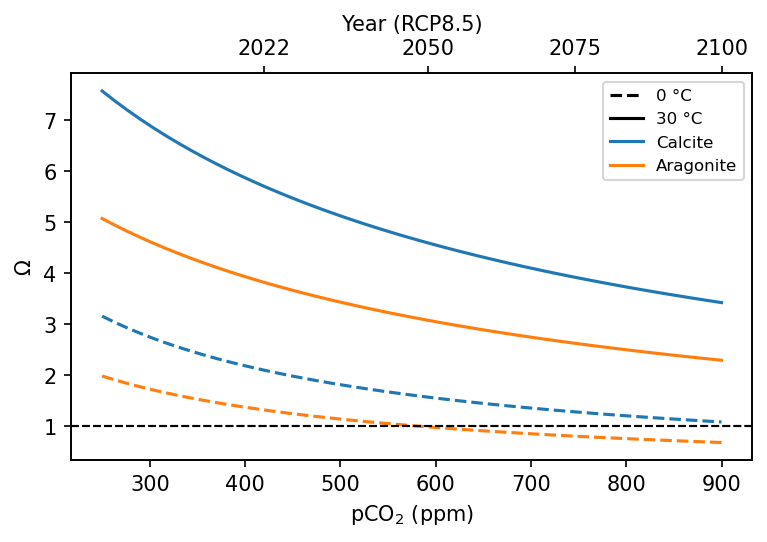

In [53]:
fig, ax = plt.subplots(figsize=(5, 3.5), constrained_layout=True)


for T, ls in zip([0, 30], ['--', '-']):

    sw = cb.Csys(TA=2300, pCO2=np.linspace(250, 900), T_in=T)

    ax.plot(sw.pCO2, sw.OmegaC, ls=ls, color='C0')
    ax.plot(sw.pCO2, sw.OmegaA, ls=ls, color='C1')

    ax.axhline(1, ls='--', color='k', lw=1)

ax.plot([],[], ls='--', color='k', label='0 °C')
ax.plot([],[], ls='-', color='k', label='30 °C')
ax.plot([],[], ls='-', color='C0', label='Calcite')
ax.plot([],[], ls='-', color='C1', label='Aragonite')
ax.legend(fontsize=8)    

ax.set_xlabel('$pCO_2$ (ppm)')
ax.set_ylabel('$\Omega$')


years = np.array([2022, 2050, 2075, 2100])
ppms = 420 + (900 - 420) * (years - 2022) / (2100 - 2022)
tax = ax.twiny()
tax.set_xticks(ppms)
tax.set_xticklabels(years)
tax.set_xlim(ax.get_xlim())
tax.set_xlabel('Year (RCP8.5)')

fig.savefig('figures/carbon-Omega-pCO2.png')

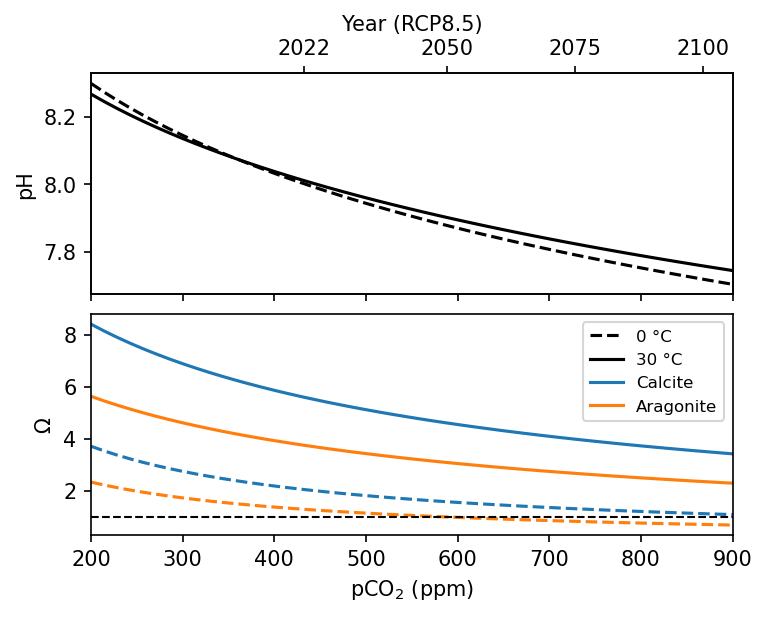

In [15]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(5,4), sharex=True, constrained_layout=True)

pCO2 = np.linspace(200, 900)

for T, ls in zip([30, 0], ['-', '--']):
    swC = cb.Csys(pCO2=pCO2, TA=2300, T_in=T)

    ax0.plot(swC.pCO2, swC.pHtot, color='k', ls=ls)
    
    # ax1.plot(swC.pCO2, swC.OmegaC, color='w', ls=ls)
    # ax1.plot(swC.pCO2, swC.OmegaA, color='w', ls=ls)
    
    ax1.plot(swC.pCO2, swC.OmegaC, color='C0', ls=ls)
    ax1.plot(swC.pCO2, swC.OmegaA, color='C1', ls=ls)
    
ax1.axhline(1, ls='--', color='k', lw=1)

ax1.plot([],[], ls='--', color='k', label='0 °C')
ax1.plot([],[], ls='-', color='k', label='30 °C')
ax1.plot([],[], ls='-', color='C0', label='Calcite')
ax1.plot([],[], ls='-', color='C1', label='Aragonite')
ax1.legend(fontsize=8)


years = np.array([2022, 2050, 2075, 2100])
ppms = 420 + (900 - 420) * (years - 2022) / (2100 - 2022)
tax = ax0.twiny()
tax.set_xticks(ppms)
tax.set_xticklabels(years)
tax.set_xlim(ax0.get_xlim())
tax.set_xlabel('Year (RCP8.5)')

ax1.set_xlabel('$pCO_2$ (ppm)')
ax1.set_ylabel('$\Omega$')
ax0.set_ylabel('pH')

ax0.set_xlim(200, 900)
fig.savefig('figures/carbon-pCO2-pH.1.png')

## Ocean Acidification

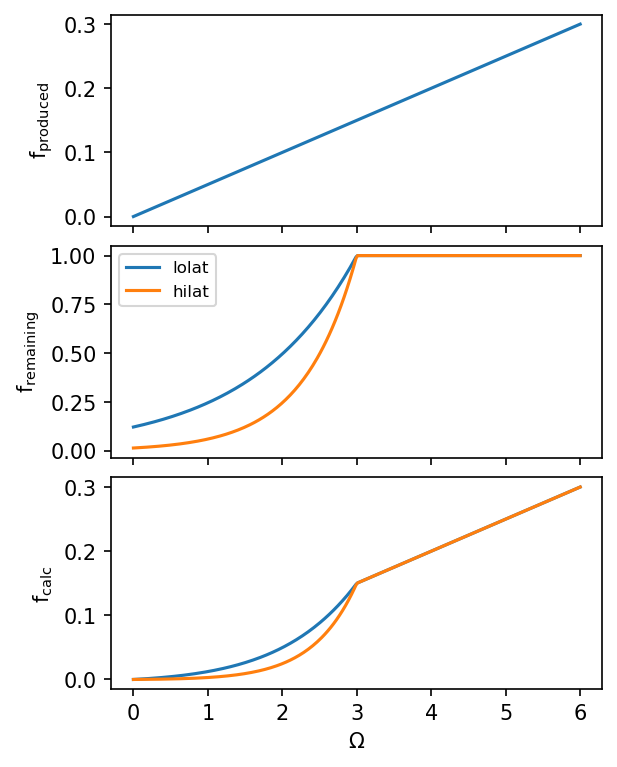

In [156]:
Omega = np.linspace(0, 6, 300)

Rcalc = 0.05 * Omega
# Rcalc[Omega < 1] = 0

fig, (cax, dax, eax) = plt.subplots(3, 1, figsize=[4, 5], constrained_layout=True, sharex=True)


cax.plot(Omega, Rcalc)

cax.set_ylabel('$f_{produced}$')


sinking_rate = 10  # m d-1
omega_thresh = 3
k = 0.07  # d-1
n = 1  # reaction order

for mld, box in [(100, 'lolat'), (200, 'hilat')]:
    days = mld / sinking_rate

    f_remaining = np.exp(k * days * (Omega - omega_thresh)**n)
    f_remaining[Omega > omega_thresh] = 1

    dax.plot(Omega, f_remaining, label=box)

    eax.plot(Omega, Rcalc * f_remaining, label=box)
    
dax.set_ylabel('$f_{remaining}$')
dax.legend(fontsize=8)

eax.set_ylabel('$f_{calc}$')

eax.set_xlabel('$\Omega$')

fig.savefig('figures/carbon-model-fcalc.png')

# TA DIC Calc Diss

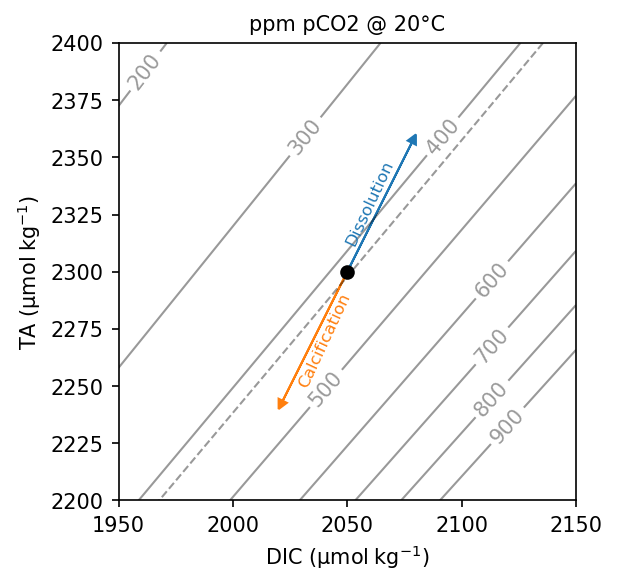

In [42]:
DIC = np.linspace(1950, 2150)
TA = np.linspace(2200, 2400)

dic, ta = np.meshgrid(DIC, TA)

sw = cb.Csys(DIC=dic, TA=ta, T_in=20)

pCO2_levels = np.array([200, 300, 400, 500, 600, 700, 800, 900])
CO2_levels = sw.Ks.K0 * pCO2_levels

fmt = {pco2: f'{pco2:.0f}' for pco2, co2 in zip(pCO2_levels, CO2_levels)}

fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)

cs = ax.contour(dic, ta, sw.pCO2, pCO2_levels, colors=[(0,0,0,0.4)], linestyles='-', linewidths=1)
plt.clabel(cs, fmt=fmt)

ax.contour(dic, ta, sw.pCO2, [420], colors=[(0,0,0,0.4)], linestyles='--', linewidths=1)

ax.scatter(2050, 2300, zorder=2, color='k')
dCO3 = 30

ax.arrow(2050, 2300, -dCO3, -dCO3 * 2, head_width=4, head_length=4, fc='C1', ec='C1', lw=1, length_includes_head=True)
ax.text(2050 - dCO3/2 + 5, 2300 - dCO3, 'Calcification', rotation=65, ha='center', va='center', fontsize=8, color='C1')

ax.arrow(2050, 2300, dCO3, dCO3 * 2, head_width=4, head_length=4, fc='C0', ec='C0', lw=1, length_includes_head=True)
ax.text(2050 + dCO3/2 - 5, 2300 + dCO3, 'Dissolution', rotation=65, ha='center', va='center', fontsize=8, color='C0')


ax.set_xlabel('DIC ($\mu mol~kg^{-1}$)')
ax.set_ylabel('TA ($\mu mol~kg^{-1}$)')

ax.set_aspect(1)

ax.set_title('ppm pCO2 @ 20°C', fontsize=10)

fig.savefig('figures/carbon-DIC-TA-calc.3.png')